In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
from sklearn.datasets import fetch_california_housing

ds = fetch_california_housing()
ds.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [3]:
X = ds.data
y = ds.target

In [4]:
X.shape

(20640, 8)

In [5]:
y.shape

(20640,)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
#help(Sequential)

In [9]:
from tensorflow.keras.layers import Input, Dense, Activation

model = Sequential()

model.add(Input(shape=(8,)))           # 8 features, so 8 inputs
model.add(Dense(8, activation='relu')) # first layer
model.add(Dense(4, activation='relu')) # hidden layer
model.add(Dense(1))                    # output layer, 1 output (predicted value)

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - loss: 2.8958
Epoch 2/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.7722
Epoch 3/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.5616
Epoch 4/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.5029
Epoch 5/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.4529
Epoch 6/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.4192
Epoch 7/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.4210
Epoch 8/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.3912
Epoch 9/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.3792
Epoch 10/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.3750
Epoch 11/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.3801
Epoch 12/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.3714
Epoch 13/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.3631
Epoch 14/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.3453
Epoch 15/50
452/452 ━━━━━━━━━

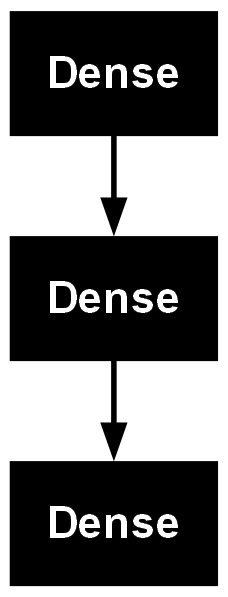

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [12]:
loss = model.history.history['loss']

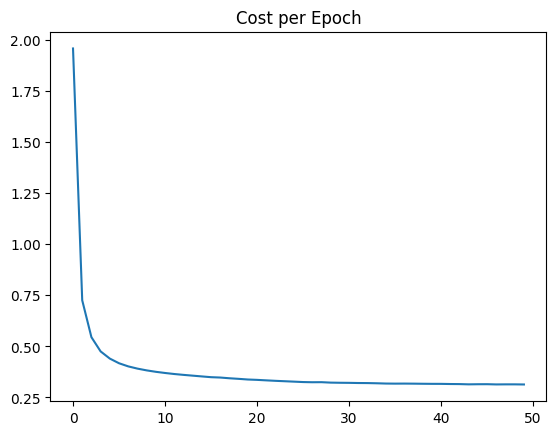

In [13]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Cost per Epoch");

In [14]:
model.evaluate(X_test, y_test, verbose=0) # gives MSE on test data

0.3631080389022827

In [15]:
predictions = model.predict(X_test)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step


In [16]:
predictions_df = pd.DataFrame(y_test, columns=['Actual value'])
predictions = pd.Series(predictions.reshape(predictions.shape[0],))
predictions_df = pd.concat([predictions_df, predictions], axis=1)
predictions_df.columns = ['Actual value', 'Prediction']
predictions_df['Error'] = predictions_df['Prediction'] - predictions_df['Actual value']
predictions_df['AbsError'] = predictions_df['Error'].abs()
predictions_df.head()

,Actual value,Prediction,Error,AbsError
0,4.06200,3.373669,-0.688331,0.688331
1,5.00001,5.458389,0.458379,0.458379
2,1.22900,1.307656,0.078656,0.078656
3,2.09100,1.761254,-0.329746,0.329746
4,5.00001,4.051704,-0.948306,0.948306


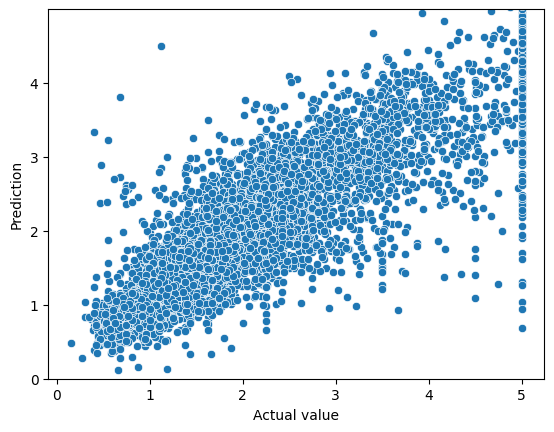

In [17]:
fig, ax = plt.subplots()
sns.scatterplot(x='Actual value', y='Prediction', data=predictions_df, ax=ax)
ax.set_ylim(0,5)
ax.set_yticks(range(0,5))

<Axes: xlabel='Error', ylabel='Count'>

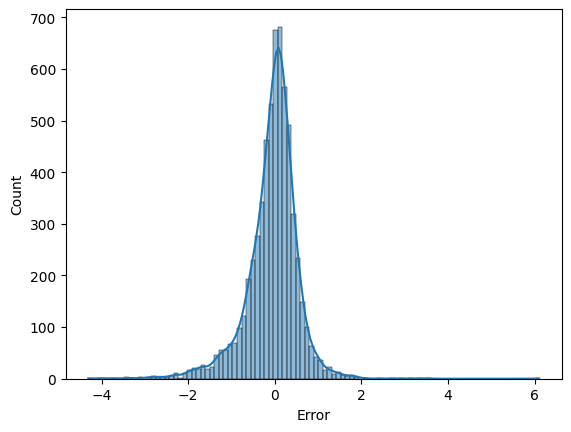

In [18]:
sns.histplot(predictions_df['Error'], bins=100, kde=True)

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions_df['Actual value'], predictions_df['Prediction']) # should match MSE given by model.evaluate()

0.36310797841447406

In [20]:
predictions_df['AbsError'].mean()

0.41034741368234623

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions_df['Actual value'], predictions_df['Prediction']) # should match MAE in cell above

0.41034741368234623

In [22]:
model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [23]:
# get the hidden layer and get its weights and biases
hidden1 = model.layers[1]
weigths,biases = hidden1.get_weights()
weigths

array([[-1.5367666 ,  0.5578632 ,  0.91849107,  0.4004497 ],
       [ 0.48640004,  0.30859554,  1.2143872 ,  0.51258546],
       [-1.1379403 ,  0.34243038, -0.50819266, -0.25250834],
       [-0.17888296,  0.26494405, -0.89329773, -0.2557593 ],
       [-0.48211303, -0.10195341,  0.38939202, -0.40084916],
       [ 0.5273591 , -0.07975588, -0.4525347 ,  0.5942349 ],
       [ 0.32114583, -1.2568455 , -1.1789087 , -1.1678939 ],
       [-0.59614944,  0.61493313, -0.56319606,  0.09937736]],
      dtype=float32)

In [24]:
biases

array([0.5820168 , 0.20370772, 0.00558734, 0.46961448], dtype=float32)